In [3]:
import pandas as pd
import geopandas as gpd
import rasterio

from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
# bs_path = ('D:\Berkeley\Research\ExplainableWildfire\datasets\doi_10.6071_M3QX18__v7\burn_severity_CA')
bs_path = '/Users/MacBookPro/Documents/Berkeley/ExplainableFire/doi_10.6071_M3QX18__v7'

In [5]:
# ca_fires = pd.read_csv('D:\Berkeley\Research\ExplainableWildfire\datasets\doi_10.6071_M3QX18__v7\Area_burned_in_each_burn_severity_class_and_emissions_per_fire_1984_2020.csv')
ca_fires = pd.read_csv('/Users/MacBookPro/Documents/Berkeley/ExplainableFire/doi_10.6071_M3QX18__v7/Area_burned_in_each_burn_severity_class_and_emissions_per_fire_1984_2020.csv')

In [6]:
ca_fires.head()

,Event_ID,Fire_Name,Lat,Long,Fire_Year,Fire_Month,Total_area_burned(ha),Unchanged(ha),Low_Severity(ha),Moderate_Severity(ha),...,CH4(kg),NMOC(kg),SO2(kg),NH3(kg),NO(kg),NO2(kg),NOx(kg),PM2.5(kg),OC(kg),BC(kg)
0,CA3268211688619840421,PROCTOR,32.682,-116.886,1984,4,1222.20,0.00,300.96,691.38,...,122498.892,1334643.84,40974.4476,93153.2148,72501.624,52617.2868,116967.780,439157.412,205992.036,72591.8796
1,CA3341311687319840530,AGUANGA,33.413,-116.873,1984,5,2250.81,0.54,719.28,1209.42,...,270244.296,2652322.32,84675.1509,176318.4834,136579.959,104980.0932,215969.733,921608.307,551366.541,128230.0443
2,CA3375011772919840615,LOMA RIDGE,33.750,-117.729,1984,6,559.26,5.58,268.83,267.03,...,44565.093,476699.76,14949.4482,32872.9653,25819.893,19010.9259,41448.456,158066.550,77518.152,25344.1260
3,CA3428511755419840528,LYTLE,34.285,-117.554,1984,5,988.47,20.79,134.19,446.58,...,243621.297,1726734.24,64527.7401,91820.5767,70816.158,70530.9435,99933.183,721917.063,715550.607,42452.7525
4,CA3444311889619841015,SQUAW FLAT,34.443,-118.896,1984,10,2447.64,19.80,1748.97,607.32,...,297284.805,2563898.40,90086.0247,156232.3275,124645.644,105702.7491,189641.601,951805.737,717583.221,100634.9715


In [8]:
ca_fires['% of Fire at High Severity'] = ca_fires['High_Severity(ha)']/ca_fires['Total_area_burned(ha)']

In [9]:
ca_fires['% of Fire at High Severity'] = ca_fires['High_Severity(ha)']/ca_fires['Total_area_burned(ha)']
ca_fires['% of Fire at Moderate Severity'] = ca_fires['Moderate_Severity(ha)']/ca_fires['Total_area_burned(ha)']
ca_fires['% of Fire at Low Severity'] = ca_fires['Low_Severity(ha)']/ca_fires['Total_area_burned(ha)']


In [10]:
fig = px.scatter(ca_fires, x='Fire_Year', y='% of Fire at High Severity', size_max=60,
                    size='Total_area_burned(ha)', color='CO2(kg)')

fig.show()

In [60]:
fig = px.scatter(ca_fires, x='Fire_Month', y='% of Fire at High Severity', size_max=60,
                    size='Total_area_burned(ha)', color='CO2(kg)')

fig.show()

### Distribution of Area

(0.0, 4000.0)

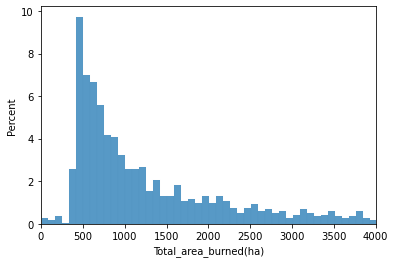

In [61]:
sns.histplot(ca_fires['Total_area_burned(ha)'], stat='percent', bins=5000)
plt.xlim(0,4000)


In [62]:
fires = pd.read_csv(r"D:\GitHub\ExplainableFire\notebooks\Fire Perimeter & BAER Soil Burn.csv")
fires = fires[~fires['Fire Name'].isna()]
fires.columns
fires['month'] = fires['Ignition Date'].apply(lambda x: x.split('/')[0])
fires['month']=fires['month'].astype(float)
fires['Year'].describe()
fires.head()

,Number,Year,Fire Name,Fire ID,Ignition Date,Administrative Unit,State,Soil Burn Data,UL,LR,Unnamed: 10,Unnamed: 11,Unnamed: 12,month
0,0.0,2021.0,Tamarack,CA3862811985720210704,07/04/2021,Humboldt-Toiyabe National Forest,California,Yes,"-119.8969479062838985,38.6123081465986502","-119.5262321340889571,38.8009370542154883",0.0,NaN,NaN,7.0
1,1.0,2021.0,Beckwourth Complex,CA3987512036820210703,07/03/2021,Plumas National Forest,California,Yes,"-120.3877769520188679,39.8169806501244494","-120.0085300418146943,40.0927017114231319",1.0,NaN,NaN,7.0
2,2.0,2021.0,Caldor,CA3858612053820210815,08/15/2021,Region 05 (Pacific Southwest),California,Yes,"-120.6720414050161168,38.5441752403372391","-119.9191566261133062,38.9069642788759040",NaN,NaN,NaN,8.0
3,3.0,2021.0,Dixie,CA3987612137920210714,07/14/2021,Region 05 (Pacific Southwest),California,Yes,"-121.7789720373888116,39.6535052572116342","-120.0881382648391735,40.8583005264497316",NaN,NaN,NaN,7.0
5,5.0,2021.0,East Fork,CA3876011973020210701,07/01/2021,Region 05 (Pacific Southwest),California,Yes,"-119.7951003038420907,38.7160818374311475","-119.6711056969029556,38.8145298168099586",4.0,NaN,NaN,7.0


In [63]:
fires['NAME'] = fires['Fire Name'].apply(lambda x: x.upper())

In [64]:
common = ca_fires.merge(fires, left_on=['Fire_Name','Fire_Year'], right_on=['NAME','Year'])

In [65]:
common.shape

(36, 42)

In [66]:
fires_baer_summary = pd.read_csv(r'D:\GitHub\ExplainableFire\notebooks\fire_baer_summary.csv')

In [67]:
fires_baer_summary.head()

,Unnamed: 0,fire,low,low med,med high,high
0,0,0,490034,1410087,1740831,51272
1,1,1,260210,2205181,2709791,421797
2,2,4,6379,30113,20764,0
3,3,5,15063,72461,39019,3537
4,4,8,34624,342677,252454,48414


In [68]:
fires_baer_summary['low fraction'] = fires_baer_summary['low']/fires_baer_summary[['low', 'low med', 'med high', 'high']].sum(axis=1)
fires_baer_summary['low med fraction'] = fires_baer_summary['low med']/fires_baer_summary[['low', 'low med', 'med high', 'high']].sum(axis=1)
fires_baer_summary['med high fraction'] = fires_baer_summary['med high']/fires_baer_summary[['low', 'low med', 'med high', 'high']].sum(axis=1)
fires_baer_summary['high fraction'] = fires_baer_summary['high']/fires_baer_summary[['low', 'low med', 'med high', 'high']].sum(axis=1)

Clustering

In [100]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

pd.set_option('max_columns', None)

In [81]:
# define fire of interest
# foi = common
foi = fires_baer_summary.merge(common, left_on='fire', right_on='Number')
foi.head()

,Unnamed: 0,fire,low,low med,med high,high,low fraction,low med fraction,med high fraction,high fraction,Event_ID,Fire_Name,Lat,Long,Fire_Year,Fire_Month,Total_area_burned(ha),Unchanged(ha),Low_Severity(ha),Moderate_Severity(ha),High_Severity(ha),Grass_Burned(ha),CO2(kg),CO(kg),CH4(kg),NMOC(kg),SO2(kg),NH3(kg),NO(kg),NO2(kg),NOx(kg),PM2.5(kg),OC(kg),BC(kg),% of Fire at High Severity,% of Fire at Moderate Severity,% of Fire at Low Severity,Number,Year,Fire Name,Fire ID,Ignition Date,Administrative Unit,State,Soil Burn Data,UL,LR,Unnamed: 10,Unnamed: 11,Unnamed: 12,month,NAME
0,7,11,84818,322769,809306,410553,0.052117,0.198329,0.497286,0.252268,CA20200829_20201113_UCM343_SLINK_CF00030684,SLINK,38.522417,-119.565897,2020,8,10792.26,15.75,2814.84,4543.02,2520.72,897.93,9.669694e+08,4.987873e+07,1.958069e+06,1.424434e+07,5.363624e+05,7.681035e+05,6.058564e+05,5.908047e+05,8.642174e+05,5.848317e+06,5.612204e+06,3.763976e+05,0.233567,0.420952,0.260820,11.0,2020.0,Slink,CA3856811956820200830,08/30/2020,Humboldt-Toiyabe National Forest,California,Yes,"-119.5903115020738596,38.4551737746568847","-119.4838275268957091,38.5879355632307579",10.0,NaN,NaN,8.0,SLINK
1,8,16,137567,141552,155363,33838,0.293746,0.302255,0.331745,0.072254,CA20200904_20201224_UCM247_CREEK_CF00001391,CREEK,37.332856,-119.276384,2020,9,153659.34,1877.94,22777.92,58350.33,67141.62,3511.53,1.728206e+10,8.662546e+08,3.679807e+07,2.528428e+08,9.648033e+06,1.303701e+07,1.009880e+07,1.040489e+07,1.399089e+07,1.076820e+08,1.106328e+08,5.514740e+06,0.436951,0.379738,0.148236,16.0,2020.0,Creek,ca3720111927220200905,09/29/2020,Sierra National Forest,California,Yes,"-119.4944434766787964,36.9858939160336959","-118.9310573526680770,37.6508308304225281",NaN,NaN,NaN,9.0,CREEK
2,9,19,1878688,170985,288053,65744,0.781657,0.071141,0.119849,0.027354,CA20200720_20201029_UCM431_GOLD_CF00003917,GOLD,41.063839,-120.816197,2020,7,9125.91,2.34,3752.28,3769.38,1598.04,3.87,1.101213e+09,5.471095e+07,2.379259e+06,1.607992e+07,6.165839e+05,8.173449e+05,6.301157e+05,6.606823e+05,8.644207e+05,6.921520e+06,7.245488e+06,3.281595e+05,0.175110,0.413042,0.411168,19.0,2020.0,Gold,ca4106412076220200720,07/20/2020,Modoc National Forest,California,Yes,"-121.6244887337319369,40.9975492455113866","-120.6789515112445059,41.8464816888683231",NaN,NaN,NaN,7.0,GOLD
3,10,20,96920,326861,821762,283415,0.063390,0.213780,0.537465,0.185365,CA20200718_20200828_UCM302_HOG_CF00003874,HOG,40.420231,-120.805078,2020,7,3848.58,6.21,326.97,1338.84,2114.91,61.65,4.922806e+08,2.405239e+07,1.090736e+06,7.173054e+06,2.799724e+05,3.541240e+05,2.738198e+05,2.964685e+05,3.686164e+05,3.139477e+06,3.385506e+06,1.281977e+05,0.549530,0.347879,0.084959,20.0,2020.0,Hog,ca4042112086320200718,07/18/2020,Lassen National Forest,California,Yes,"-120.8879400493739524,40.3649780674832854","-120.7236324621228931,40.4887828949799484",19.0,NaN,NaN,7.0,HOG
4,11,22,216236,612362,225484,2428,0.204670,0.579608,0.213423,0.002298,CA20200814_20200827_UCM237_LOYALTON_CF00001600,LOYALTON,39.707443,-120.107770,2020,8,18858.24,3.24,2256.93,7220.70,7998.66,1378.71,1.409756e+09,7.892284e+07,2.435420e+06,2.102777e+07,7.228405e+05,1.291832e+06,1.012077e+06,8.520278e+05,1.544739e+06,7.820695e+06,5.896524e+06,8.341308e+05,0.424147,0.382894,0.119679,22.0,2020.0,Loyalton,CA3968112017120200814,08/14/2020,Tahoe National Forest,California,Yes,"-120.2329369573684232,39.6079061539253985","-119.9987574220572668,39.7995644384991465",NaN,NaN,NaN,8.0,LOYALTON


In [82]:
fig = px.scatter(foi, x='Fire_Year', y='% of Fire at High Severity', size_max=60,
                    color='Total_area_burned(ha)', size='CO2(kg)')

fig.show()

In [83]:
fig = px.scatter(foi, x='Fire_Month', y='% of Fire at High Severity', size_max=60,
                    size='CO2(kg)', color='Total_area_burned(ha)', hover_data=['Fire_Name'])

fig.show()

In [84]:
fig = px.scatter(foi, x='Fire_Month', y='% of Fire at Moderate Severity', size_max=60,
                    color='Total_area_burned(ha)', size='CO2(kg)', hover_data=['Fire_Name'])

fig.show()

In [85]:
fig = px.scatter(foi, x='Fire_Month', y='% of Fire at Low Severity', size_max=60,
                    color='Total_area_burned(ha)', size='CO2(kg)', hover_data=['Fire_Name'])

fig.show()

In [86]:
fig = px.scatter(foi, x='Fire_Month', y='% of Fire at Low Severity', size_max=60,
                    color='Total_area_burned(ha)', size='OC(kg)', hover_data=['Fire_Name'])

fig.show()

In [87]:
foi.columns

Index(['Unnamed: 0', 'fire', 'low', 'low med', 'med high', 'high',
       'low fraction', 'low med fraction', 'med high fraction',
       'high fraction', 'Event_ID', 'Fire_Name', 'Lat', 'Long', 'Fire_Year',
       'Fire_Month', 'Total_area_burned(ha)', 'Unchanged(ha)',
       'Low_Severity(ha)', 'Moderate_Severity(ha)', 'High_Severity(ha)',
       'Grass_Burned(ha)', 'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)',
       'SO2(kg)', 'NH3(kg)', 'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)',
       'OC(kg)', 'BC(kg)', '% of Fire at High Severity',
       '% of Fire at Moderate Severity', '% of Fire at Low Severity', 'Number',
       'Year', 'Fire Name', 'Fire ID', 'Ignition Date', 'Administrative Unit',
       'State', 'Soil Burn Data', 'UL', 'LR', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'month', 'NAME'],
      dtype='object')

In [93]:
corr_variables = [ 'low fraction', 'low med fraction', 'med high fraction',
       'high fraction','Total_area_burned(ha)', 'Unchanged(ha)', 'Low_Severity(ha)',
       'Moderate_Severity(ha)', 'High_Severity(ha)', 'Grass_Burned(ha)',
       'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)', 'SO2(kg)', 'NH3(kg)',
       'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)', 'OC(kg)', 'BC(kg)',
      '% of Fire at High Severity',
       '% of Fire at Moderate Severity', '% of Fire at Low Severity','low', 'low med', 'med high', 'high']

In [90]:
# sns.pairplot(foi[['Grass_Burned(ha)',
#        'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)', 'SO2(kg)', 'NH3(kg)',
#        'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)', 'OC(kg)', 'BC(kg)']])
# plt.show()

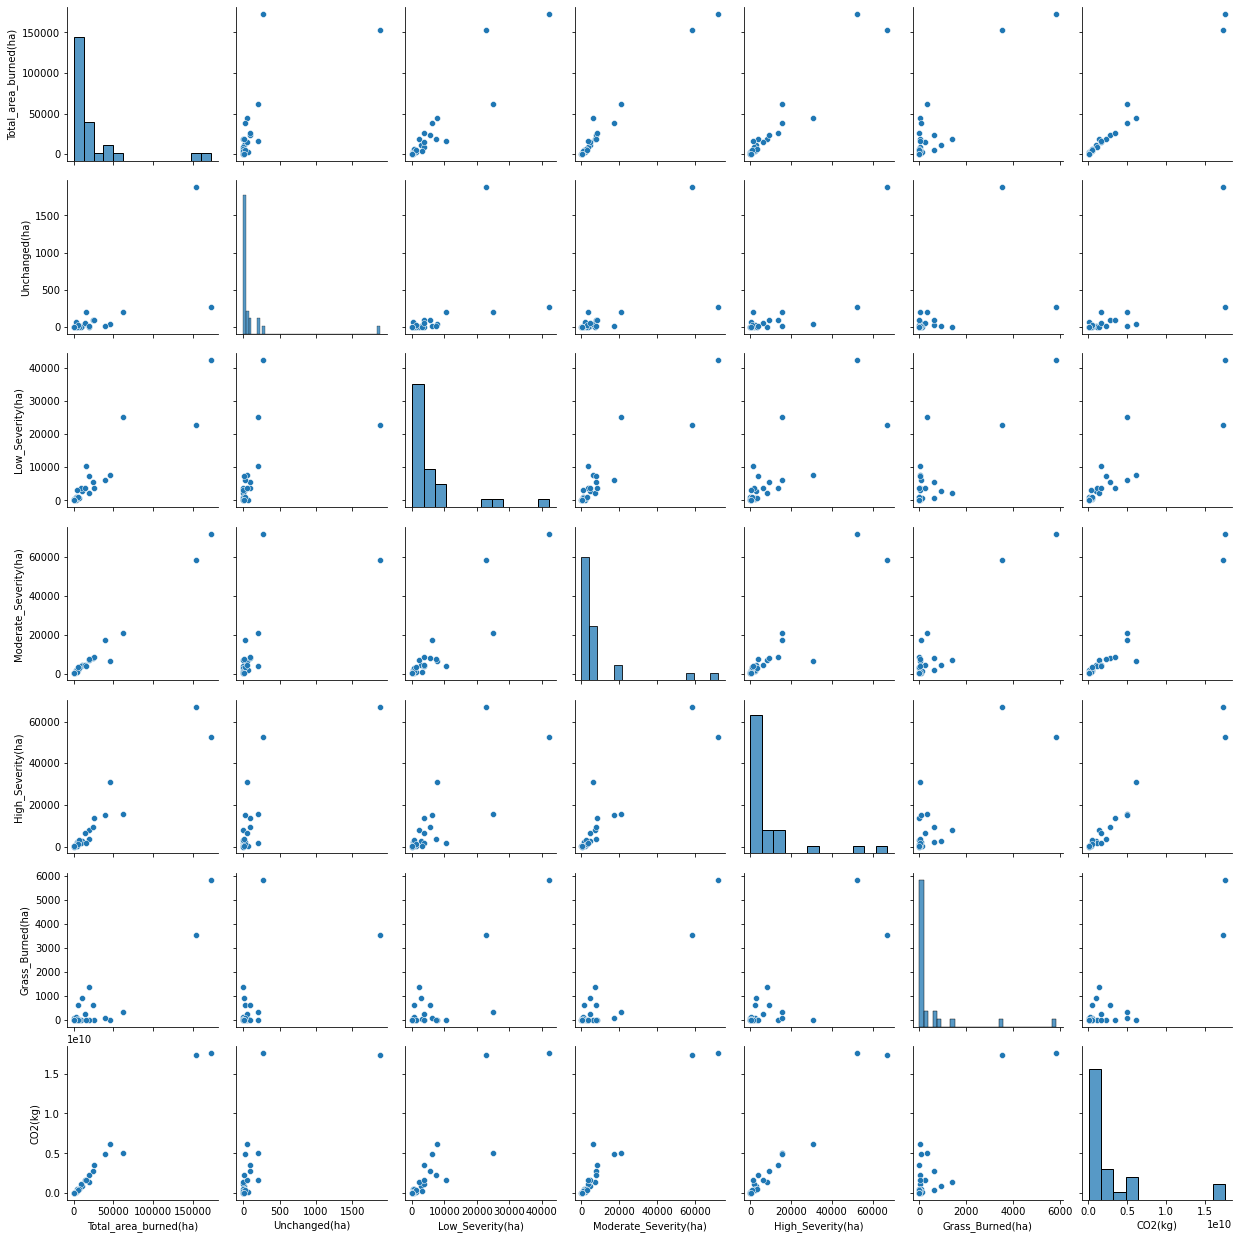

In [91]:
# Basic correlogram
sns.pairplot(foi[X_columns])
plt.show()

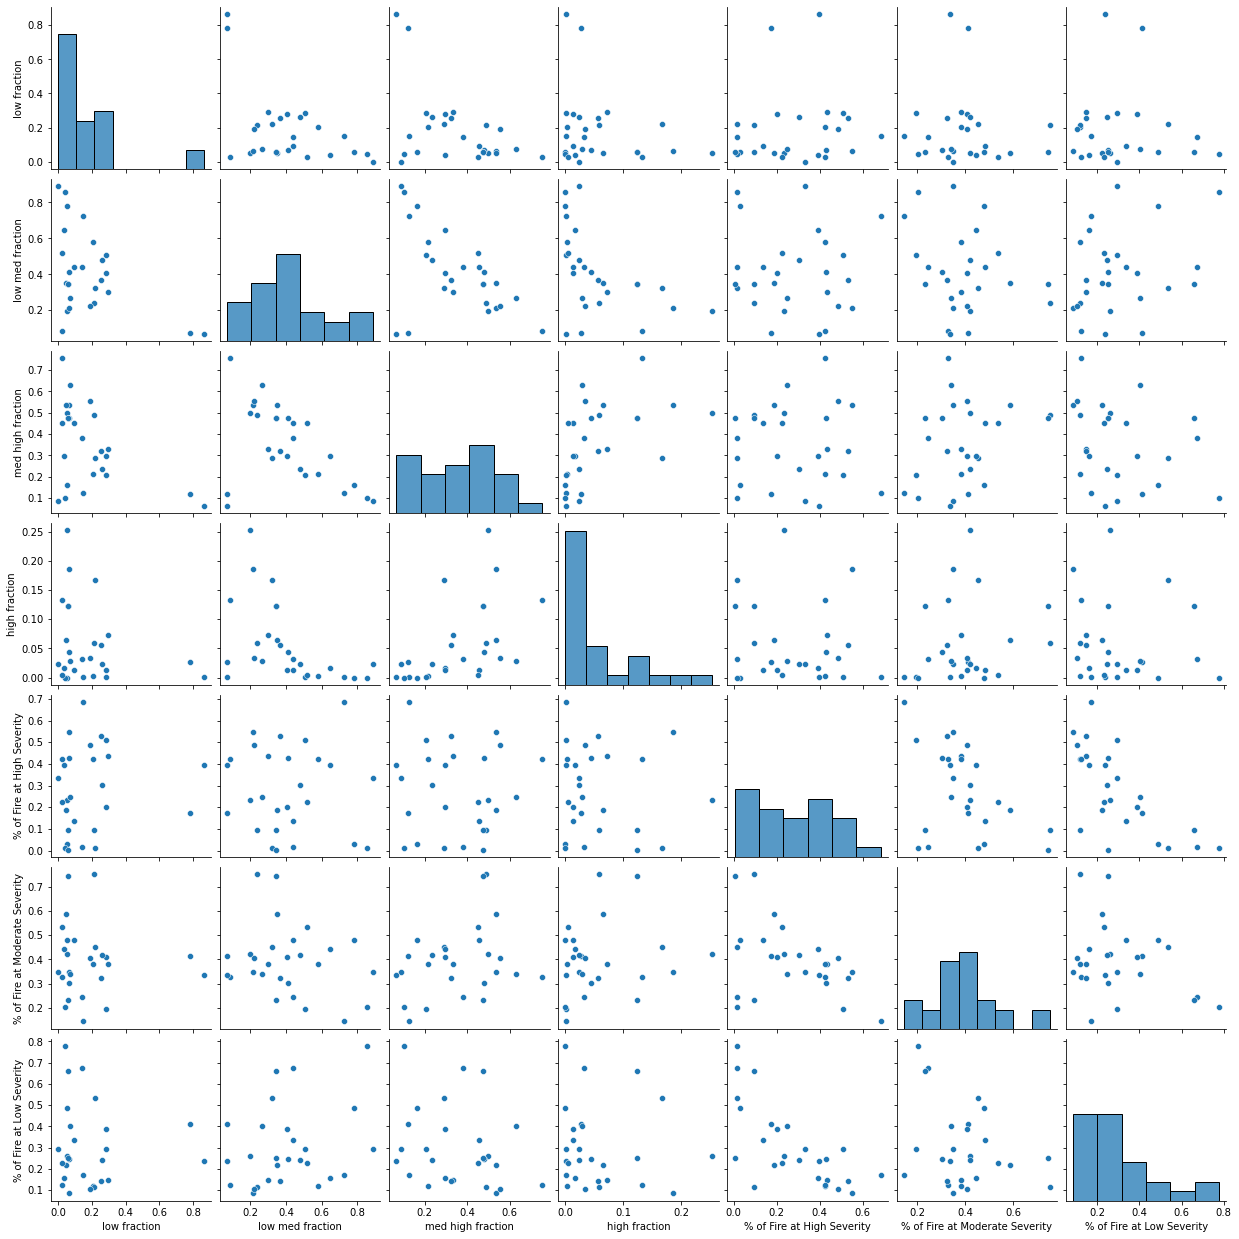

In [94]:
sns.pairplot(foi[['low fraction', 'low med fraction', 'med high fraction',
       'high fraction','% of Fire at High Severity',
       '% of Fire at Moderate Severity', '% of Fire at Low Severity']])
plt.show()

In [96]:
foi.columns

Index(['Unnamed: 0', 'fire', 'low', 'low med', 'med high', 'high',
       'low fraction', 'low med fraction', 'med high fraction',
       'high fraction', 'Event_ID', 'Fire_Name', 'Lat', 'Long', 'Fire_Year',
       'Fire_Month', 'Total_area_burned(ha)', 'Unchanged(ha)',
       'Low_Severity(ha)', 'Moderate_Severity(ha)', 'High_Severity(ha)',
       'Grass_Burned(ha)', 'CO2(kg)', 'CO(kg)', 'CH4(kg)', 'NMOC(kg)',
       'SO2(kg)', 'NH3(kg)', 'NO(kg)', 'NO2(kg)', 'NOx(kg)', 'PM2.5(kg)',
       'OC(kg)', 'BC(kg)', '% of Fire at High Severity',
       '% of Fire at Moderate Severity', '% of Fire at Low Severity', 'Number',
       'Year', 'Fire Name', 'Fire ID', 'Ignition Date', 'Administrative Unit',
       'State', 'Soil Burn Data', 'UL', 'LR', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'month', 'NAME'],
      dtype='object')

In [120]:
ohe = OneHotEncoder()

months = pd.DataFrame(ohe.fit_transform(foi[['Fire_Month']]).toarray(), columns=list(range(6,12)))

In [117]:
X_columns = ['Total_area_burned(ha)', 'Unchanged(ha)', '% of Fire at High Severity',
       '% of Fire at Moderate Severity', '% of Fire at Low Severity', 'Grass_Burned(ha)', 'CO2(kg)']

In [123]:
test_df = foi[X_columns].merge(months, left_index=True, right_index=True)
test_df.head()

,Total_area_burned(ha),Unchanged(ha),% of Fire at High Severity,% of Fire at Moderate Severity,% of Fire at Low Severity,Grass_Burned(ha),CO2(kg),6,7,8,9,10,11
0,10792.26,15.75,0.233567,0.420952,0.260820,897.93,9.669694e+08,0.0,0.0,1.0,0.0,0.0,0.0
1,153659.34,1877.94,0.436951,0.379738,0.148236,3511.53,1.728206e+10,0.0,0.0,0.0,1.0,0.0,0.0
2,9125.91,2.34,0.175110,0.413042,0.411168,3.87,1.101213e+09,0.0,1.0,0.0,0.0,0.0,0.0
3,3848.58,6.21,0.549530,0.347879,0.084959,61.65,4.922806e+08,0.0,1.0,0.0,0.0,0.0,0.0
4,18858.24,3.24,0.424147,0.382894,0.119679,1378.71,1.409756e+09,0.0,0.0,1.0,0.0,0.0,0.0


In [144]:
k_list = list(range(2,14))

X = test_df.to_numpy()
X = MinMaxScaler().fit_transform(X)

ssd_list = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state=184462)
    km.fit(X)
    ssd_list.append(km.inertia_)

In [145]:
px.line(x=k_list, y=ssd_list,markers=True)

In [167]:
K=5
km = KMeans(n_clusters=K, random_state=184462)
km.fit(X)

test_df['label'] = km.labels_
test_df['label'] = test_df['label'].astype(str)

In [168]:
test_df

,Total_area_burned(ha),Unchanged(ha),% of Fire at High Severity,% of Fire at Moderate Severity,% of Fire at Low Severity,Grass_Burned(ha),CO2(kg),6,7,8,9,10,11,label
0,10792.26,15.75,0.233567,0.420952,0.260820,897.93,9.669694e+08,0.0,0.0,1.0,0.0,0.0,0.0,1
1,153659.34,1877.94,0.436951,0.379738,0.148236,3511.53,1.728206e+10,0.0,0.0,0.0,1.0,0.0,0.0,4
2,9125.91,2.34,0.175110,0.413042,0.411168,3.87,1.101213e+09,0.0,1.0,0.0,0.0,0.0,0.0,2
3,3848.58,6.21,0.549530,0.347879,0.084959,61.65,4.922806e+08,0.0,1.0,0.0,0.0,0.0,0.0,2
4,18858.24,3.24,0.424147,0.382894,0.119679,1378.71,1.409756e+09,0.0,0.0,1.0,0.0,0.0,0.0,1
5,5123.52,20.52,0.423623,0.328889,0.122348,620.64,4.345161e+08,0.0,0.0,0.0,0.0,0.0,1.0,3
6,45117.00,45.36,0.684706,0.143142,0.170963,8.28,6.182869e+09,0.0,0.0,0.0,1.0,0.0,0.0,0
7,2510.73,69.12,0.096856,0.752984,0.116500,15.39,1.345186e+08,0.0,0.0,0.0,1.0,0.0,0.0,0
8,6573.15,3.42,0.487054,0.407490,0.104936,0.00,5.001922e+08,0.0,0.0,0.0,1.0,0.0,0.0,0
9,1405.80,0.00,0.334251,0.349488,0.292574,33.30,1.594231e+08,0.0,0.0,0.0,0.0,1.0,0.0,3


In [169]:
test_df.merge(foi[['Fire_Name']], left_index=True, right_index=True)

,Total_area_burned(ha),Unchanged(ha),% of Fire at High Severity,% of Fire at Moderate Severity,% of Fire at Low Severity,Grass_Burned(ha),CO2(kg),6,7,8,9,10,11,label,Fire_Name
0,10792.26,15.75,0.233567,0.420952,0.260820,897.93,9.669694e+08,0.0,0.0,1.0,0.0,0.0,0.0,1,SLINK
1,153659.34,1877.94,0.436951,0.379738,0.148236,3511.53,1.728206e+10,0.0,0.0,0.0,1.0,0.0,0.0,4,CREEK
2,9125.91,2.34,0.175110,0.413042,0.411168,3.87,1.101213e+09,0.0,1.0,0.0,0.0,0.0,0.0,2,GOLD
3,3848.58,6.21,0.549530,0.347879,0.084959,61.65,4.922806e+08,0.0,1.0,0.0,0.0,0.0,0.0,2,HOG
4,18858.24,3.24,0.424147,0.382894,0.119679,1378.71,1.409756e+09,0.0,0.0,1.0,0.0,0.0,0.0,1,LOYALTON
5,5123.52,20.52,0.423623,0.328889,0.122348,620.64,4.345161e+08,0.0,0.0,0.0,0.0,0.0,1.0,3,MOUNTAIN VIEW
6,45117.00,45.36,0.684706,0.143142,0.170963,8.28,6.182869e+09,0.0,0.0,0.0,1.0,0.0,0.0,0,SLATER
7,2510.73,69.12,0.096856,0.752984,0.116500,15.39,1.345186e+08,0.0,0.0,0.0,1.0,0.0,0.0,0,SNOW
8,6573.15,3.42,0.487054,0.407490,0.104936,0.00,5.001922e+08,0.0,0.0,0.0,1.0,0.0,0.0,0,VALLEY
9,1405.80,0.00,0.334251,0.349488,0.292574,33.30,1.594231e+08,0.0,0.0,0.0,0.0,1.0,0.0,3,CAPLES


<AxesSubplot:xlabel='Total_area_burned(ha)', ylabel='Count'>

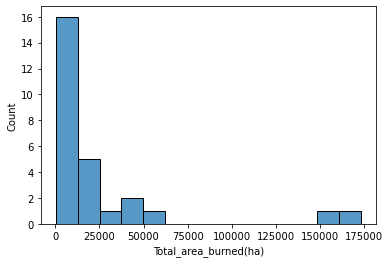

In [170]:
sns.histplot(test_df, x='Total_area_burned(ha)')

In [171]:
px.scatter(test_df.merge(foi[['Fire_Name']], left_index=True, right_index=True), x='Total_area_burned(ha)', y='Grass_Burned(ha)', 
        color='label', size='% of Fire at High Severity', size_max=60, hover_data=['Fire_Name'], title='High Severity')

In [172]:
px.scatter(test_df.merge(foi[['Fire_Name']], left_index=True, right_index=True), x='Total_area_burned(ha)', y='Grass_Burned(ha)', 
        color='label', size='% of Fire at Moderate Severity', size_max=60, hover_data=['Fire_Name'], title='Moderate Severity')

In [173]:
px.scatter(test_df.merge(foi[['Fire_Name']], left_index=True, right_index=True), x='Total_area_burned(ha)', y='Grass_Burned(ha)', 
        color='label', size='% of Fire at Low Severity', size_max=60, hover_data=['Fire_Name'], marginal_x='rug', marginal_y='rug')

In [ ]:
px.scatter(test_df.merge(foi[['Fire_Name']], left_index=True, right_index=True), x='Total_area_burned(ha)', y='Grass_Burned(ha)', 
        color='label', size='% of Fire at Low Severity', size_max=60, hover_data=['Fire_Name'], marginal_x='rug', marginal_y='rug')